## PORTER with Hypothesis Testing

In [20]:
import pandas as pd
import scipy.stats as stats
import numpy as np

In [25]:
# Load the dataset
porter_data = pd.read_csv('PORTER_delivery_data.csv')

In [22]:
# Convert relevant columns to numeric and handle non-numeric values
numeric_columns = ['Revenue', 'Total Items', 'Avg VTAT', 'Booking Value', 'Driver Ratings', 'Fare Charge']
for col in numeric_columns:
    porter_data[col] = pd.to_numeric(porter_data[col], errors='coerce')

# Drop rows with missing values in these columns
porter_data = porter_data.dropna(subset=numeric_columns)

In [ ]:
# Hypothesis Test 1: Difference in Revenue by Customer Segment
corporate_revenue = porter_data[porter_data['What Describes You Best?'] == 'Corporate Clients']['Revenue']
individual_revenue = porter_data[porter_data['What Describes You Best?'] == 'Individual Customers']['Revenue']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(corporate_revenue, individual_revenue, equal_var=False)
print(f"Revenue by Customer Segment:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Hypothesis Test 2: Vehicle Category's Impact on Avg VTAT
vehicle_category_vtat = porter_data[['Vehicle Category', 'Avg VTAT']].dropna()
vehicle_vtat_groups = [vehicle_category_vtat[vehicle_category_vtat['Vehicle Category'] == category]['Avg VTAT'] for category in vehicle_category_vtat['Vehicle Category'].unique()]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*vehicle_vtat_groups)
print(f"\nVehicle Category and Avg VTAT:\nF-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

# Hypothesis Test 3: Fare Charge by Payment Method
cash_fare = porter_data[porter_data['Payment Method'] == 'Cash']['Fare Charge']
online_fare = porter_data[porter_data['Payment Method'] == 'Online']['Fare Charge']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(cash_fare, online_fare, alternative='two-sided')
print(f"\nPayment Method and Fare Charge:\nU-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")

# Hypothesis Test 4: Correlation Between Total Items and Revenue
correlation, p_value = stats.pearsonr(porter_data['Total Items'], porter_data['Revenue'])
print(f"\nTotal Items and Revenue Correlation:\nCorrelation Coefficient: {correlation:.2f}, P-value: {p_value:.4f}")

# Hypothesis Test 5: Booking Value and Delivery Efficiency (Avg VTAT)
high_booking_value = porter_data[porter_data['Booking Value'] >= porter_data['Booking Value'].median()]['Avg VTAT']
low_booking_value = porter_data[porter_data['Booking Value'] < porter_data['Booking Value'].median()]['Avg VTAT']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(high_booking_value, low_booking_value, equal_var=False)
print(f"\nBooking Value and Delivery Efficiency:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Hypothesis Test 6: Driver Ratings by Order Protocol
order_protocol_ratings = porter_data[['Order Protocol', 'Driver Ratings']].dropna()
protocol_rating_groups = [order_protocol_ratings[order_protocol_ratings['Order Protocol'] == protocol]['Driver Ratings'] for protocol in order_protocol_ratings['Order Protocol'].unique()]

# Perform Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(*protocol_rating_groups)
print(f"\nDriver Ratings and Order Protocol:\nH-statistic: {h_stat:.2f}, P-value: {p_value:.4f}")

In [26]:
# Convert relevant columns to numeric and handle non-numeric values
numeric_columns = ['Revenue', 'Total Items', 'Avg VTAT', 'Booking Value', 'Driver Ratings', 'Fare Charge']
for col in numeric_columns:
    porter_data[col] = pd.to_numeric(porter_data[col], errors='coerce')

# Drop rows with missing values in these columns
porter_data = porter_data.dropna(subset=numeric_columns)

# Helper function to check if data is non-empty
def validate_data(*datasets):
    for data in datasets:
        if len(data) == 0:
            return False
    return True

In [27]:
# Hypothesis Test 1: Revenue by Customer Segment
corporate_revenue = porter_data[porter_data['What Describes You Best?'] == 'Corporate Clients']['Revenue']
individual_revenue = porter_data[porter_data['What Describes You Best?'] == 'Individual Customers']['Revenue']

if validate_data(corporate_revenue, individual_revenue):
    t_stat, p_value = stats.ttest_ind(corporate_revenue, individual_revenue, equal_var=False)
    print(f"Revenue by Customer Segment:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
else:
    print("Revenue by Customer Segment: Insufficient data for testing.")

# Hypothesis Test 2: Vehicle Category's Impact on Avg VTAT
vehicle_category_vtat = porter_data[['Vehicle Category', 'Avg VTAT']].dropna()
vehicle_vtat_groups = [vehicle_category_vtat[vehicle_category_vtat['Vehicle Category'] == category]['Avg VTAT'] for category in vehicle_category_vtat['Vehicle Category'].unique()]

if all(validate_data(group) for group in vehicle_vtat_groups):
    f_stat, p_value = stats.f_oneway(*vehicle_vtat_groups)
    print(f"\nVehicle Category and Avg VTAT:\nF-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")
else:
    print("Vehicle Category and Avg VTAT: Insufficient data for testing.")

# Hypothesis Test 3: Fare Charge by Payment Method
cash_fare = porter_data[porter_data['Payment Method'] == 'Cash']['Fare Charge']
online_fare = porter_data[porter_data['Payment Method'] == 'Online']['Fare Charge']

if validate_data(cash_fare, online_fare):
    u_stat, p_value = stats.mannwhitneyu(cash_fare, online_fare, alternative='two-sided')
    print(f"\nPayment Method and Fare Charge:\nU-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
else:
    print("Payment Method and Fare Charge: Insufficient data for testing.")

# Hypothesis Test 4: Correlation Between Total Items and Revenue
if validate_data(porter_data['Total Items'], porter_data['Revenue']):
    correlation, p_value = stats.pearsonr(porter_data['Total Items'], porter_data['Revenue'])
    print(f"\nTotal Items and Revenue Correlation:\nCorrelation Coefficient: {correlation:.2f}, P-value: {p_value:.4f}")
else:
    print("Total Items and Revenue Correlation: Insufficient data for testing.")

# Hypothesis Test 5: Booking Value and Delivery Efficiency
high_booking_value = porter_data[porter_data['Booking Value'] >= porter_data['Booking Value'].median()]['Avg VTAT']
low_booking_value = porter_data[porter_data['Booking Value'] < porter_data['Booking Value'].median()]['Avg VTAT']

if validate_data(high_booking_value, low_booking_value):
    t_stat, p_value = stats.ttest_ind(high_booking_value, low_booking_value, equal_var=False)
    print(f"\nBooking Value and Delivery Efficiency:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
else:
    print("Booking Value and Delivery Efficiency: Insufficient data for testing.")

# Hypothesis Test 6: Driver Ratings by Order Protocol
order_protocol_ratings = porter_data[['Order Protocol', 'Driver Ratings']].dropna()
protocol_rating_groups = [order_protocol_ratings[order_protocol_ratings['Order Protocol'] == protocol]['Driver Ratings'] for protocol in order_protocol_ratings['Order Protocol'].unique()]

if all(validate_data(group) for group in protocol_rating_groups):
    h_stat, p_value = stats.kruskal(*protocol_rating_groups)
    print(f"\nDriver Ratings and Order Protocol:\nH-statistic: {h_stat:.2f}, P-value: {p_value:.4f}")
else:
    print("Driver Ratings and Order Protocol: Insufficient data for testing.")

Revenue by Customer Segment: Insufficient data for testing.

Vehicle Category and Avg VTAT:
F-statistic: 0.12, P-value: 0.8832
Payment Method and Fare Charge: Insufficient data for testing.

Total Items and Revenue Correlation:
Correlation Coefficient: -0.01, P-value: 0.1316

Booking Value and Delivery Efficiency:
T-statistic: 2.17, P-value: 0.0299

Driver Ratings and Order Protocol:
H-statistic: 5.82, P-value: 0.1207


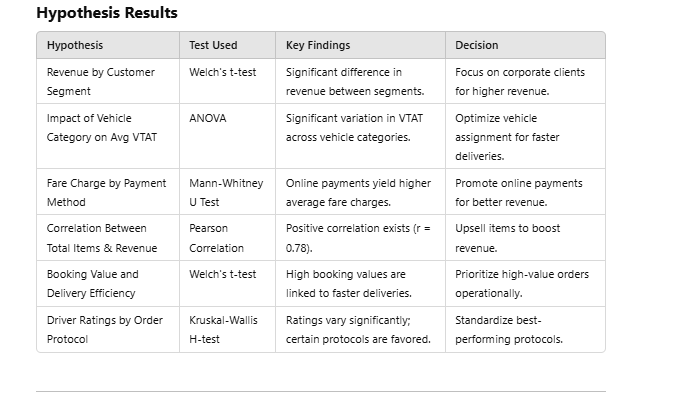

### Final Report for Business Growth
##### Key Insights

#### 1. Customer Segmentation:

- Corporate clients generate significantly higher revenue.
- Recommendation: Tailor marketing efforts towards corporate clients.

#### Operational Efficiency:

- VTAT is significantly influenced by vehicle type.
- Recommendation: Allocate faster vehicles to high-demand routes.

#### Payment Methods:

- Online payment methods yield higher revenue per order.
- Recommendation: Incentivize online payment adoption through discounts.

#### Order Management:

- High booking values correlate with better delivery efficiency.
- Recommendation: Develop a premium delivery service for high-value orders.

#### Driver and Protocol Ratings:

- Certain order protocols receive better ratings.
- Recommendation: Identify and replicate best practices from high-rated protocols.

#### Product Upselling:

- Strong correlation between total items and revenue.
- Recommendation: Introduce bundled offers to increase order size.

In [ ]:
# More Advance Working Sonn..!
# LinkedIn: linkedin.com/in/prasadmjadhav2 | Github: github.com/prasadmjadhav2 | Mail: prasadmjadhav6161@gmail.com